Feature Matrix Shape: (4647, 78)
Labels Shape: (4647,)
Epoch 1/15
117/117 [==============================] - 0s 829us/step


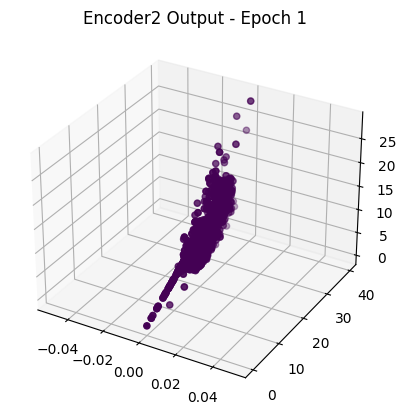

30/30 [==============================] - 1s 20ms/step - loss: 11.4439 - val_loss: 11.4011
Epoch 2/15
117/117 [==============================] - 0s 887us/step


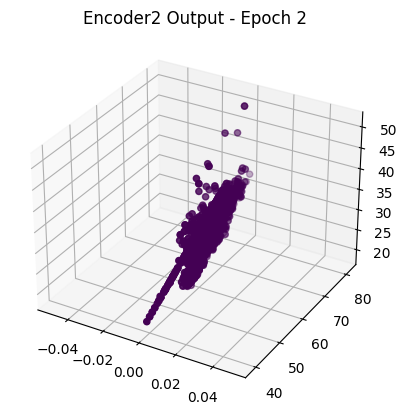

30/30 [==============================] - 1s 17ms/step - loss: 11.2819 - val_loss: 11.1910
Epoch 3/15
117/117 [==============================] - 0s 940us/step


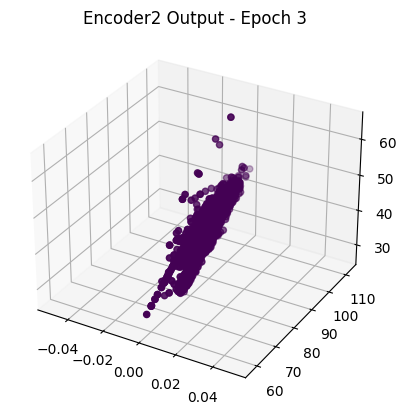

30/30 [==============================] - 1s 23ms/step - loss: 11.1430 - val_loss: 11.1481
Epoch 4/15
117/117 [==============================] - 0s 859us/step


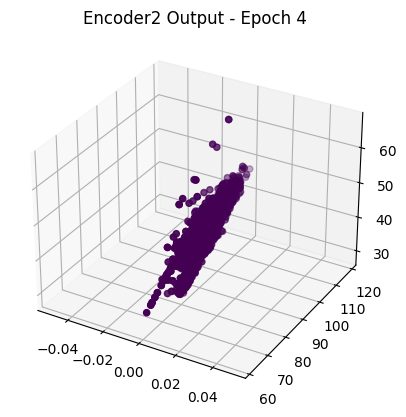

30/30 [==============================] - 0s 17ms/step - loss: 11.1253 - val_loss: 11.1447
Epoch 5/15
117/117 [==============================] - 0s 985us/step


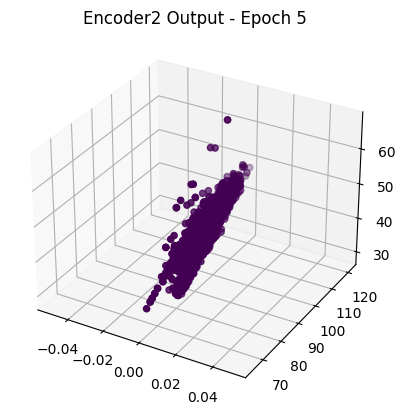

30/30 [==============================] - 1s 23ms/step - loss: 11.1248 - val_loss: 11.1446
Epoch 6/15
117/117 [==============================] - 0s 958us/step


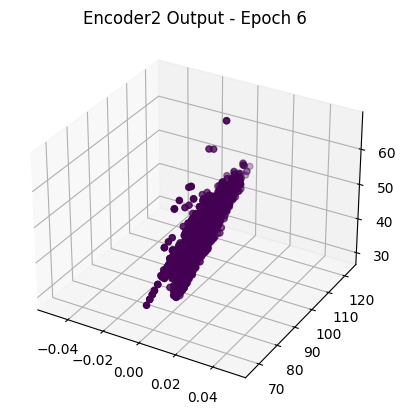

30/30 [==============================] - 1s 23ms/step - loss: 11.1247 - val_loss: 11.1445
Epoch 7/15
117/117 [==============================] - 0s 969us/step


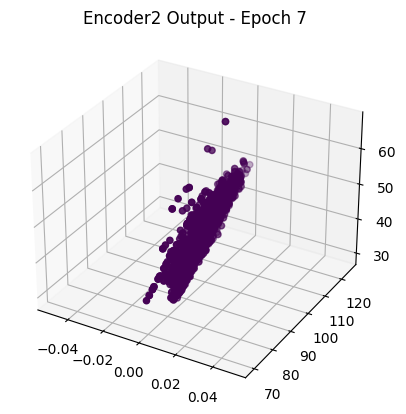

30/30 [==============================] - 1s 22ms/step - loss: 11.1248 - val_loss: 11.1446
Epoch 8/15
117/117 [==============================] - 0s 1ms/step


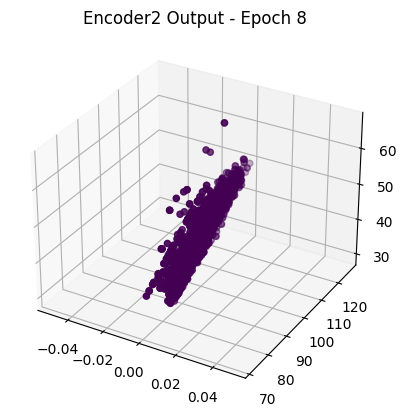

30/30 [==============================] - 1s 18ms/step - loss: 11.1247 - val_loss: 11.1445
Epoch 9/15
117/117 [==============================] - 0s 961us/step


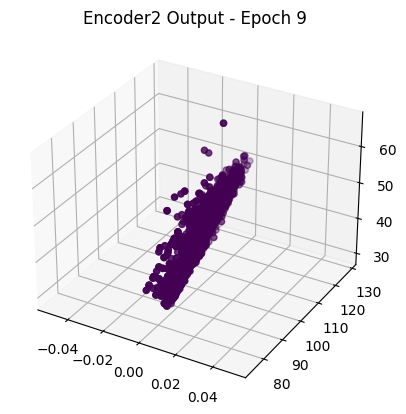

30/30 [==============================] - 1s 18ms/step - loss: 11.1247 - val_loss: 11.1444
Epoch 10/15
117/117 [==============================] - 0s 1ms/step


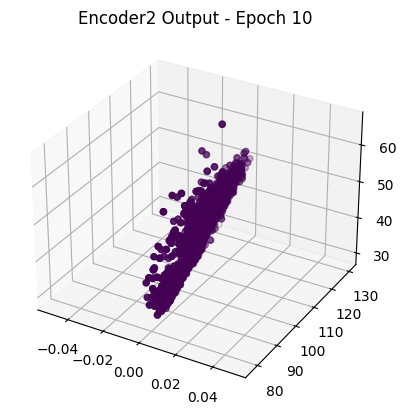

30/30 [==============================] - 1s 23ms/step - loss: 11.1246 - val_loss: 11.1444
Epoch 11/15
117/117 [==============================] - 0s 852us/step


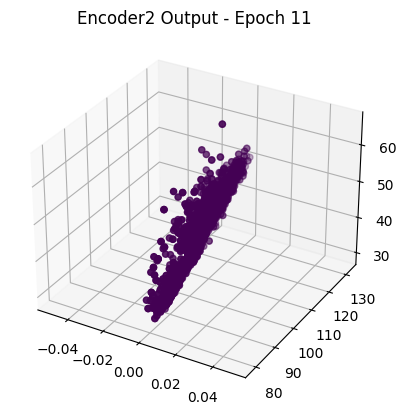

30/30 [==============================] - 1s 18ms/step - loss: 11.1246 - val_loss: 11.1445
Epoch 12/15
117/117 [==============================] - 0s 881us/step


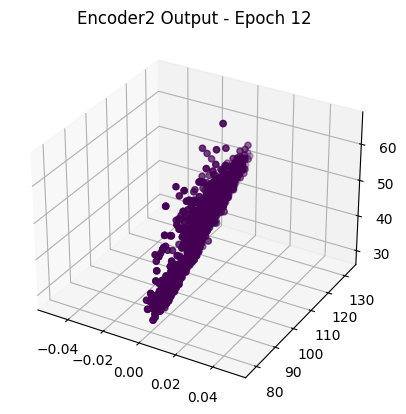

30/30 [==============================] - 1s 19ms/step - loss: 11.1246 - val_loss: 11.1443
Epoch 13/15
117/117 [==============================] - 0s 1ms/step


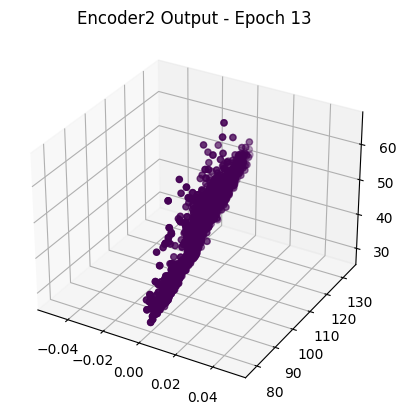

30/30 [==============================] - 1s 19ms/step - loss: 11.1246 - val_loss: 11.1443
Epoch 14/15
117/117 [==============================] - 0s 1ms/step


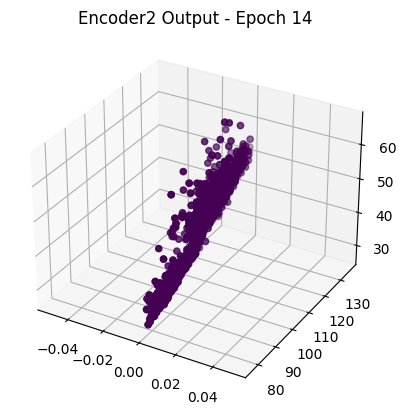

30/30 [==============================] - 1s 28ms/step - loss: 11.1245 - val_loss: 11.1442
Epoch 15/15
117/117 [==============================] - 0s 1ms/step


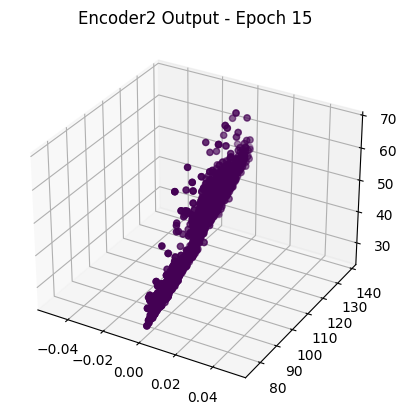

30/30 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

      anomal       0.00      0.00      0.00         0
      normal       1.00      0.98      0.99       930

    accuracy                           0.98       930
   macro avg       0.50      0.49      0.49       930
weighted avg       1.00      0.98      0.99       930



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


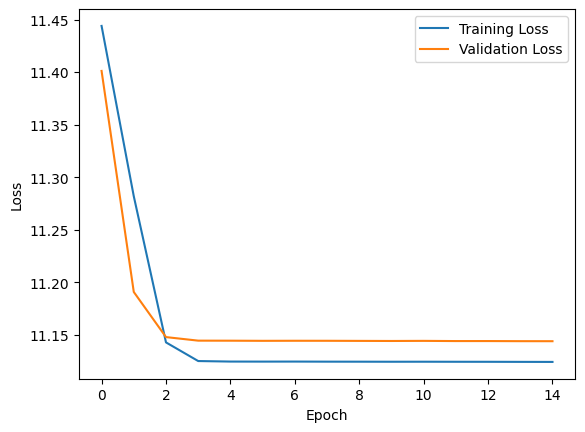

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import layers, Input, Model, callbacks
import matplotlib.pyplot as plt
import tensorflow as tf

def load_and_preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

def cut_audio_into_windows(audio_data, window_size=1, stride=1, sample_rate=16000):
    window_size_samples = int(window_size * sample_rate)
    stride_samples = int(stride * sample_rate)
    windows = [audio_data[i:i + window_size_samples] for i in range(0, len(audio_data) - window_size_samples + 1, stride_samples)]
    return windows

def extract_mfcc_features(windows, sample_rate=16000, mfcc_duration=0.5, mfcc_stride=0.5, n_mfcc=39):
    mfcc_duration_samples = int(mfcc_duration * sample_rate)
    mfcc_stride_samples = int(mfcc_stride * sample_rate)

    mfccs = []
    for window in windows:
        mfcc = librosa.feature.mfcc(y=window, sr=sample_rate, n_mfcc=n_mfcc, hop_length=int(mfcc_stride_samples), n_fft=int(mfcc_duration_samples), center=False)
        mfccs.append(mfcc)

    return mfccs

# Initialize lists to store features and labels
folder_path = r'/content/drive/MyDrive/data'
all_features = []
all_labels = []

# Process each subfolder
for subfolder in ['train_new', 'test_new', 'train_cut_new', 'test_cut_new']:
    subfolder_path = os.path.join(folder_path, subfolder)

    # Process each engine subfolder --'engine2_broken_new', 'engine3_heavyload_new'
    for engine_subfolder in ['engine1_good_new']:
        engine_path = os.path.join(subfolder_path, engine_subfolder)

        # Process each .wav file in the subfolder
        for filename in os.listdir(engine_path):
            if filename.endswith('.wav'):
                file_path = os.path.join(engine_path, filename)

                # Load and preprocess audio
                audio_data, sample_rate = load_and_preprocess_audio(file_path)

                # Cut audio into windows
                windows = cut_audio_into_windows(audio_data, window_size=1, stride=1, sample_rate=sample_rate)
                mfcc_duration=0.5
                mfcc_stride=0.5
                n_mfcc=39
                mfcc_duration_samples = int(mfcc_duration * sample_rate)
                mfcc_stride_samples = int(mfcc_stride * sample_rate)

                for window in windows:
                    # Extract MFCC features
                    mfcc2 = librosa.feature.mfcc(y=window, sr=sample_rate, n_mfcc=n_mfcc, hop_length=int(mfcc_stride_samples), n_fft=int(mfcc_duration_samples), center=False)

                    # Flatten the MFCC matrix and store as a feature
                    flat_mfcc_features = mfcc2.flatten()
                    all_features.append(flat_mfcc_features)

                    # Assign 'normal' label to each window
                    all_labels.append('normal')

# Convert features and labels to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)

# Print the shape of the feature matrix and labels
print("Feature Matrix Shape:", X.shape)
print("Labels Shape:", y.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build and train the autoencoder model
input_shape = X_train.shape[1]
input_layer = Input(shape=(input_shape,))
encoder = layers.Dense(16, activation='relu')(input_layer)
encoder1 = layers.Dense(8, activation='relu')(encoder)
encoder2 = layers.Dense(3, activation='relu')(encoder1)

decoder = layers.Dense(3, activation='relu')(encoder2)
decoder = layers.Dense(8, activation='relu')(decoder)
decoder = layers.Dense(16, activation='relu')(decoder)
decoder = layers.Dense(input_shape, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mae')

label_mapping = {'normal': 0, 'anomal': 1}
numerical_labels = np.array([label_mapping[label] for label in y_train])

# Define a callback to store encoder2 outputs during training
class Encoder2OutputCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        encoder2_output = Model(inputs=self.model.input, outputs=self.model.layers[3].output)
        encoder2_train_output = encoder2_output.predict(X_train)
        plot_encoder2_output(encoder2_train_output, epoch)

def plot_encoder2_output(encoder2_output, epoch):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(encoder2_output[:, 0], encoder2_output[:, 1], encoder2_output[:, 2], c=numerical_labels, cmap='viridis')
    ax.set_title(f'Encoder2 Output - Epoch {epoch+1}')
    plt.show()


# Train the autoencoder with the callback
history = autoencoder.fit(
    X_train, X_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_test, X_test),
    shuffle=True,
    callbacks=[Encoder2OutputCallback()]
)

converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
# converter._experimental_lower_tensor_list_ops = False
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
model_tflite = converter.convert()
open('auto_encoder_tflite', "wb").write(model_tflite)

# Analyze Prediction Loss
prediction = autoencoder.predict(X_test)
prediction_loss = np.mean(np.abs(prediction - X_test), axis=1)

# Visualize Threshold and Evaluate Performance
loss_threshold = np.percentile(prediction_loss, 98)

# Print Classification Report
threshold_prediction = ['anomal' if i > loss_threshold else 'normal' for i in prediction_loss]
print(classification_report(y_test, threshold_prediction))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
# converter._experimental_lower_tensor_list_ops = False
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
model_tflite = converter.convert()
open('autoencoder_model2.tflite', "wb").write(model_tflite)

14564

In [ ]:
# Load the TFLite model
model_path = '/content/autoencoder_model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Print details about the TFLite model
print("Input details:", interpreter.get_input_details())
print("Output details:", interpreter.get_output_details())


Input details: [{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([ 1, 78], dtype=int32), 'shape_signature': array([-1, 78], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 16, 'shape': array([ 1, 78], dtype=int32), 'shape_signature': array([-1, 78], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
import numpy as np

# Load your TFLite model
tflite_model_path = '/content/autoencoder_model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get the model details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Extract weights and biases
weights = []
biases = []

for i, detail in enumerate(input_details + output_details):
    tensor_index = detail['index']
    tensor = interpreter.tensor(tensor_index)

    if 'weight' in detail['name'].lower():
        weights.append(tensor())
    elif 'bias' in detail['name'].lower():
        biases.append(tensor())

# Convert weights and biases to hexadecimal strings
weights_hex = [np.array(w).tobytes().hex() for w in weights]
biases_hex = [np.array(b).tobytes().hex() for b in biases]

# Print or save the hexadecimal values
for i, (w_hex, b_hex) in enumerate(zip(weights_hex, biases_hex)):
    print(f"Layer {i + 1} - Weights: {w_hex}, Biases: {b_hex}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to your external audio file
external_file_path = "/content/atmo_high_3.wav"
audio_data, sample_rate = load_and_preprocess_audio(external_file_path)
sample_rate = 16000
windows = cut_audio_into_windows(audio_data, window_size=1, stride=1, sample_rate=sample_rate)
mfcc_duration = 0.5
mfcc_stride = 0.5
n_mfcc = 39
threshold = 11.2

mfcc_duration_samples = int(mfcc_duration * sample_rate)
mfcc_stride_samples = int(mfcc_stride * sample_rate)

for window in windows:
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=window, sr=sample_rate, n_mfcc=n_mfcc, hop_length=int(mfcc_stride_samples),
                                n_fft=int(mfcc_duration_samples), center=False)

    # Predict using the autoencoder
    predicted_features = autoencoder.predict(np.expand_dims(mfcc.flatten(), axis=0))

    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(np.abs(predicted_features - mfcc.flatten()))
    print(mae)
    # Make prediction for each window
    window_prediction = "Anomal" if mae > threshold else "Normal"
    print("Window Prediction:", window_prediction)



1/1 [==============================] - 0s 29ms/step
11.047632
Window Prediction: Normal
1/1 [==============================] - 0s 28ms/step
11.380438
Window Prediction: Anomal
1/1 [==============================] - 0s 32ms/step
11.051677
Window Prediction: Normal
1/1 [==============================] - 0s 37ms/step
10.736323
Window Prediction: Normal
1/1 [==============================] - 0s 30ms/step
10.578227
Window Prediction: Normal
1/1 [==============================] - 0s 32ms/step
10.708152
Window Prediction: Normal
1/1 [==============================] - 0s 31ms/step
10.847007
Window Prediction: Normal
1/1 [==============================] - 0s 30ms/step
10.660164
Window Prediction: Normal


In [ ]:
import os

# Path to your testing data folder
testing_folder_path = "/content/drive/MyDrive/data/test_cut_new/engine2_broken_new"

# Initialize variables to store results
total_windows = 0
correct_predictions = 0

# Iterate through each file in the folder
for filename in os.listdir(testing_folder_path):
    if filename.endswith('.wav'):
        file_path = os.path.join(testing_folder_path, filename)

        # Load and preprocess audio
        audio_data, sample_rate = load_and_preprocess_audio(file_path)

        # Cut audio into windows
        windows = cut_audio_into_windows(audio_data, window_size=1, stride=1, sample_rate=sample_rate)
        mfcc_duration = 0.5
        mfcc_stride = 0.5
        n_mfcc = 39
        mfcc_duration_samples = int(mfcc_duration * sample_rate)
        mfcc_stride_samples = int(mfcc_stride * sample_rate)

        # Process each window
        for window in windows:
            # Extract MFCC features
            mfcc = librosa.feature.mfcc(y=window, sr=sample_rate, n_mfcc=n_mfcc,
                                        hop_length=int(mfcc_stride_samples), n_fft=int(mfcc_duration_samples),
                                        center=False)

            # Predict using the autoencoder
            predicted_features = autoencoder.predict(np.expand_dims(mfcc.flatten(), axis=0))

            # Calculate Mean Absolute Error (MAE)
            mae = np.mean(np.abs(predicted_features - mfcc.flatten()))

            # Make prediction for each window
            window_prediction = "Normal" if mae < threshold else "Anomaly"

            # Update counts
            total_windows += 1
            correct_predictions += (window_prediction == "Anomaly")

# Calculate accuracy
accuracy = correct_predictions / total_windows
print("Accuracy:", accuracy)


1/1 [==============================] - 0s 29ms/step
Accuracy: 0.6786967418546366


In [ ]:
import os

# Paths to your data folders
normal_folder_path = "/content/drive/MyDrive/data/test_cut_new/engine1_good_new"
anomaly_folder_path1 = "/content/drive/MyDrive/data/test_cut_new/engine2_broken_new"
anomaly_folder_path2 = "/content/drive/MyDrive/data/test_cut_new/engine3_heavyload_new"

# Threshold for classification
threshold = 14

# Initialize variables to store results
total_windows = 0
correct_predictions = 0

# Function to process a folder
def process_folder(folder_path, true_label):
    global total_windows, correct_predictions

    # Process each .wav file in the subfolder
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(folder_path, filename)
            audio_data, sample_rate = load_and_preprocess_audio(file_path)

            # Cut audio into windows
            windows = cut_audio_into_windows(audio_data, window_size=1, stride=1, sample_rate=sample_rate)
            mfcc_duration = 0.5
            mfcc_stride = 0.5
            n_mfcc = 39
            mfcc_duration_samples = int(mfcc_duration * sample_rate)
            mfcc_stride_samples = int(mfcc_stride * sample_rate)

            # Process each window
            for window in windows:
                # Extract MFCC features
                mfcc = librosa.feature.mfcc(y=window, sr=sample_rate, n_mfcc=n_mfcc,
                                            hop_length=int(mfcc_stride_samples), n_fft=int(mfcc_duration_samples),
                                            center=False)

                # Predict using the autoencoder
                predicted_features = autoencoder.predict(np.expand_dims(mfcc.flatten(), axis=0))

                # Calculate Mean Absolute Error (MAE)
                mae = np.mean(np.abs(predicted_features - mfcc.flatten()))

                # Make prediction for each window
                window_prediction = "Normal" if mae < threshold else "Anomaly"

                # Update counters
                total_windows += 1
                correct_predictions += (window_prediction == true_label)

# Process normal data
process_folder(normal_folder_path, "Normal")

# Process anomaly data from the first folder
process_folder(anomaly_folder_path1, "Anomaly")

# Process anomaly data from the second folder
process_folder(anomaly_folder_path2, "Anomaly")

# Calculate accuracy
accuracy = correct_predictions / total_windows
print("Accuracy:", accuracy)


In [ ]:
X_train.shape[1]

78